# Notebook 3 -  Kovarianz

### Generelles

Bibliotheken importieren

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Analyse der Korrelation von künstlichen, quasi-analogen Signalen vor und nachdem das Signal mit einem simulierten rauschbehafteten Analog-Digital-Konverter (ADC) "gemessen" wurde

Wir erstellen zuerst drei künstliche, quasi-analoge Signale: Signal 1 & 3 sind Sinusfunktionen (verschiedene Amplitude, gleiche Frequenz), Signal 2 ist eine Cosinusfunktion (gleiche Amplitude und Frequenz wie Sigal 1).
Alle Signale werden mit identischem Rauschen überlagert. Das wäre in der Realität z.B. der Fall, wenn das Rauschen aller signale vonderselben Rauschquelle herrühren würde. 

In [48]:
N = 1001 # Länge des Datenvektors
t = np.linspace(0, N-1, N) # Zeitvektor von Punkten mit Abstand 1 in Einheit von Nanosekunden (als konkretes Beispiel)

f_sig = 0.01 # Frequenz 
Amp1 = 1.2 # Amplitude 1
Amp3 = 5.2 # Amplitude 2 
sig1 = Amp1*np.sin(2*np.pi*f_sig*t) # Signal  1  
sig2 = Amp1*np.cos(2*np.pi*f_sig*t) # Signal 2
sig3 = Amp3*np.sin(2*np.pi*f_sig*t)  # Signal 3  
noise_amp = 0.2 # Amplitude des Rauschens
noise1 = np.random.normal(0,noise_amp,N) # normalverteiltes Rauschen mit Standardabweichung noise_amp
noise2 = np.random.normal(0,noise_amp,N) # normalverteiltes Rauschen mit Standardabweichung noise_amp
noise3 = np.random.normal(0,noise_amp,N) # normalverteiltes Rauschen mit Standardabweichung noise_amp
U1 = sig1 + noise1 # addiere Rauschen zu Signal 1
U2 = sig2 + noise1 # addiere Rauschen zu Signal 2
U3 = sig3 + noise1 # addiere Rauschen zu Signal 3

Wir visualisieren zunächst die Spannungen U1, U2 und U3. 

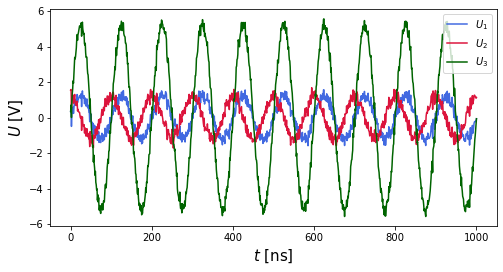

In [49]:
fig = plt.figure(figsize=(8, 4))
plt.plot(t, U1, color='royalblue', label=r"$U_1$")
plt.plot(t, U2, color='crimson', label=r"$U_2$")
plt.plot(t, U3, color = "darkgreen", label = r"$U_3$")
plt.xlabel(r'$t$ [ns]', fontsize = 15)
plt.ylabel(r'$U$ [V]', fontsize = 15)
plt.legend()
plt.show()

Nun plotten wir U2 und U3 als Funktionen von U1, um Korrelationen zwischen U1 und U2 bzw. U1 und U3 aufzudecken.

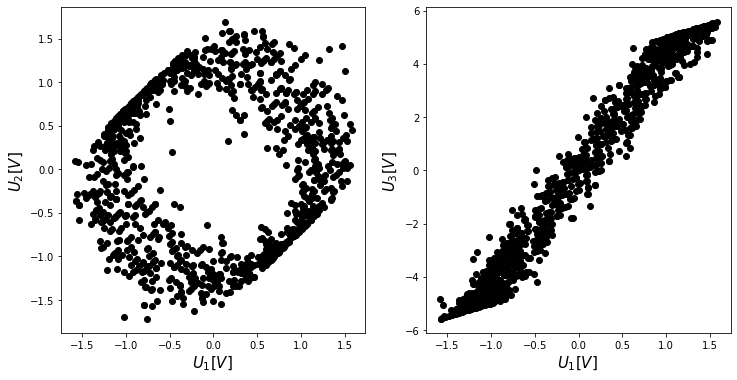

In [50]:
fig, (ax1, ax2) =  plt.subplots(1,2, figsize= (12,6))
ax1.scatter(U1, U2, color = "black", marker='o')
ax2.scatter(U1, U3, color = "black", marker='o')
ax1.set_xlabel(r'$U_1  [V]$ ', fontsize = 15)
ax1.set_ylabel(r'$U_2  [V]$ ', fontsize = 15)
ax2.set_xlabel(r'$U_1  [V]$ ', fontsize = 15)
ax2.set_ylabel(r'$U_3  [V]$ ', fontsize = 15)
plt.show()

Bestimmung der Kovarianz und der Korrelationskoeffizienten

In [51]:
# U1 U3 
C = np.stack((U1,U3), axis=0)
cov13 = np.cov(C)
corcov13 = np.corrcoef(C)
print("Der Korrelationskoeffizent für U1 und U3 ist "+str(corcov13[0,1]))

# U1 U2
D = np.stack((U1, U2), axis = 0)
cov12 = np.cov(D)
corcov12 = np.corrcoef(D)
print("Der Korrelationskoeffizent für U1 und U2 ist "+str(corcov12[0,1]))


Der Korrelationskoeffizent für U1 und U3 ist 0.9836430353417485
Der Korrelationskoeffizent für U1 und U2 ist 0.05943386819435068


Wir wollen nun die Korrelation analysieren, nachem die Signale mit einem simulierten Analog-Digital-Konverter (ADC) "gemessen" wurden.
Wir wählen ideale ADC-Parameter, um die "echte" Messung zu sehen, U_mess = U. Den Einfluss nicht-idealer Parameter kann man leicht selber erforschen.

In [52]:
Delta_t = 1 # zeitl. Abstand der Messpunkte in den gewählten Einheiten: für einen Zeitvektor t mit Abständen von je 1 Nanosekunde misst unser ADC einen Datenpunkt alle Delta_t Nanosekunden
U_max = 10 # maximal messbarer Wert: alle grösseren Werte werden als U_max angezeigt ("clipping")
U_min = 0.01 # minimaler messbarer Spannungsunterschied der Signalwerte: Spannungsauflösung des ADC
U_noise = 1 # Standardabweichung des Spannungsrauschens, das dem Signal durch den Messprozess hinzigefügt wird

# Initialisierung der Messvektoren
n_mess = math.floor(N/Delta_t)-1 # Anzahl gemesener Punkte. "floor" rundet ab
n = range(n_mess) # wird für for loop benötigt, enthält 0 und n_mess als untere und obere Grenze von n
t_mess = np.zeros(n_mess) # leerer Vektor, um die Zeitwerte zu erfassen
U1_mess = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen
U2_mess = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen
U3_mess = np.zeros(n_mess) # leerer Vektor, um die Spannungswerte zu erfassen

for i in n:
    t_mess[i] = t[(i+1)*Delta_t] # jeder (i+1)*Delta_t-te Punkt wird gemessen
    U1_mess[i] = np.clip(U_min*round((U1[(i+1)*Delta_t]+np.random.normal(0,U_noise))/U_min,0),-U_max,U_max) # numpy.clip limitiert die maximalen Werte auf [-U_max,U_max]
    U2_mess[i] = np.clip(U_min*round((U2[(i+1)*Delta_t]+np.random.normal(0,U_noise))/U_min,0),-U_max,U_max) # numpy.clip limitiert die maximalen Werte auf [-U_max,U_max]
    U3_mess[i] = np.clip(U_min*round((U3[(i+1)*Delta_t]+np.random.normal(0,U_noise))/U_min,0),-U_max,U_max) # numpy.clip limitiert die maximalen Werte auf [-U_max,U_max]

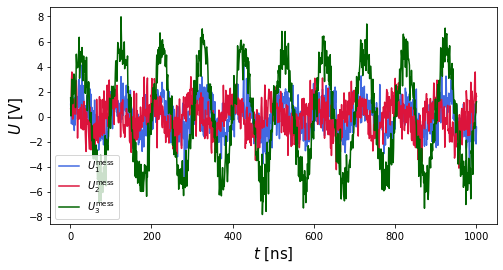

In [53]:
fig = plt.figure(figsize=(8, 4))
plt.plot(t_mess, U1_mess, color='royalblue', label=r"$U_1^{\mathrm{mess}}$")
plt.plot(t_mess, U2_mess, color='crimson', label=r"$U_2^{\mathrm{mess}}$")
plt.plot(t_mess, U3_mess,color = "darkgreen", label = r"$U_3^{\mathrm{mess}}$")
plt.xlabel(r'$t$ [ns]', fontsize = 15)
plt.ylabel(r'$U$ [V]', fontsize = 15)
plt.legend()
plt.show()



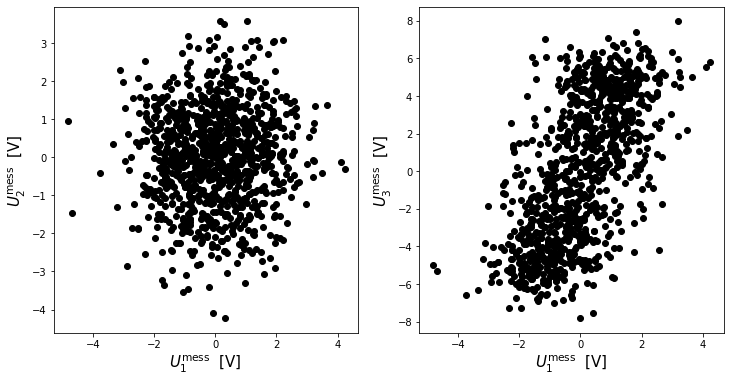

In [54]:
fig, (ax1, ax2) =  plt.subplots(1,2, figsize= (12,6))
ax1.scatter(U1_mess, U2_mess, color = "black", marker='o')
ax2.scatter(U1_mess, U3_mess, color = "black", marker='o')
ax1.set_xlabel(r'$U_1^{\mathrm{mess}}$  [V] ', fontsize = 15)
ax1.set_ylabel(r'$U_2^{\mathrm{mess}}$  [V] ', fontsize = 15)
ax2.set_xlabel(r'$U_1^{\mathrm{mess}}$  [V] ', fontsize = 15)
ax2.set_ylabel(r'$U_3^{\mathrm{mess}}$  [V] ', fontsize = 15)
plt.show()

Bestimmung der Kovarianz

In [55]:
# U1 U3 
C_mess = np.stack((U1_mess,U3_mess), axis=0)
cov13_mess = np.cov(C_mess)
corcov13_mess = np.corrcoef(C_mess)
print("Der Korrelationskoeffizent für U1_mess und U3_mess ist "+str(corcov13_mess[0,1]))

# U1 U2
D_mess = np.stack((U1_mess, U2_mess), axis = 0)
cov12_mess = np.cov(D_mess)
corcov12_mess = np.corrcoef(D_mess)
print("Der Korrelationskoeffizent für U1_mess und U2_mess ist "+str(corcov12_mess[0,1]))

Der Korrelationskoeffizent für U1_mess und U3_mess ist 0.6260717480313106
Der Korrelationskoeffizent für U1_mess und U2_mess ist 0.04572992383569649


Bestimmung der Auto-Kovarianz

In [60]:
# definiere Auto-Kovarianzfunktion
def Rxx(x, delta):
    xm = np.mean(x)
    dev_sum = 0
    for i in range(len(x) - delta):
        dev_sum += (x[i] - xm) * (x[i + delta] - xm)
    return dev_sum / (len(x) - delta)

# wende Funktion auf Beispiele an und berechne zu den Indexverschiebungen zugehörige Zeitverschiebungen "lags"
delta_max = len(U1)
Rxx_vs_delta = [Rxx(U1, i) for i in range(delta_max)]
lags = np.linspace(0, delta_max, num=delta_max)

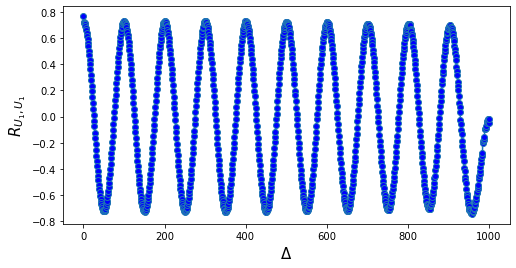

In [65]:
fig = plt.figure(figsize=(8, 4))
plt.plot(lags, Rxx_vs_delta, linestyle='-',marker='o',markerfacecolor='blue')
plt.xlabel(r'$\Delta$', fontsize = 15)
plt.ylabel(r'$R_{U_1, U_1}$', fontsize = 15)
plt.show()

##  Extra-Material: Autokorrelation für Ultraschnelle Laserpulse

Ultraschneller Laserpuls

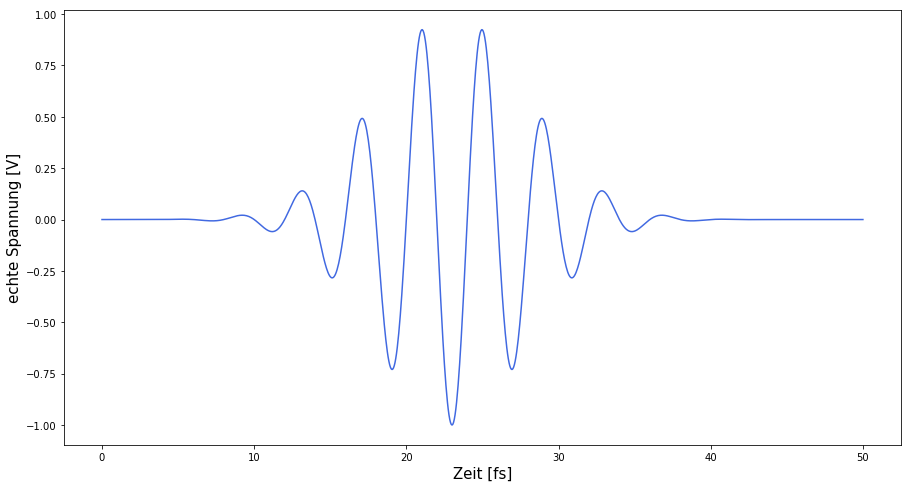

In [53]:
N = 1001 # Länge des Datenvektors
t = np.linspace(0, (N-1)/20, N) # Zeitvektor in Einheit von Femtosekunden (0.000000000000001 s)
# das Verhältnis einer fs zu einer Sekunde entspricht dem Verhältnis einer Sekunde zu 32 Mio Jahren
# t_tot = N fs für unser Beispiel

f_sig = 0.25
Amp = 1
pulse_time = 5
E = Amp*np.sin(2*np.pi*f_sig*t)*np.exp(-0.5*(t-23)**2/pulse_time**2)

plt.figure(figsize=(15, 8))
plt.plot(t, E, color='royalblue', label="E-Feld")
plt.axes().set_aspect('auto', 'datalim')
plt.xlabel('Zeit [fs]', fontsize = 15)
plt.ylabel('echte Spannung [V]', fontsize = 15)
plt.show()

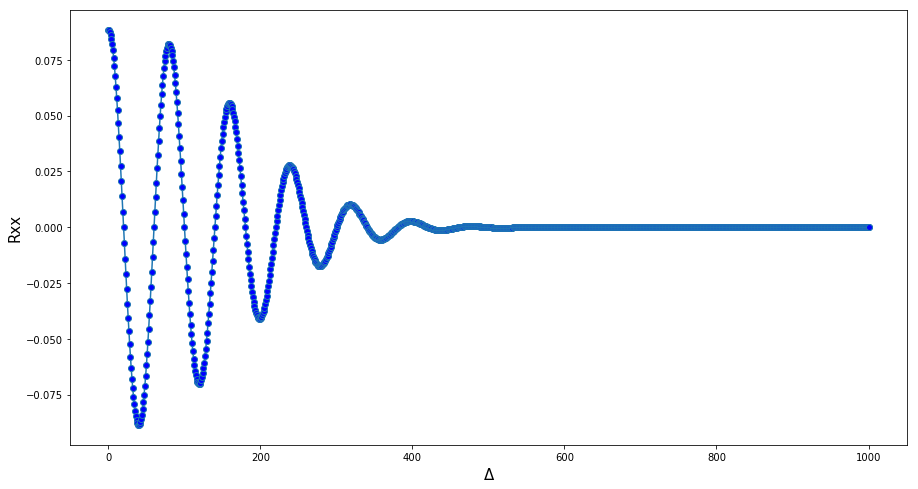

In [55]:
delta_max = len(E)

Rxx_vs_delta = [Rxx(E, i) for i in range(delta_max)]

lags = np.linspace(0, delta_max, num=delta_max)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lags, Rxx_vs_delta, linestyle='-',marker='o',markerfacecolor='blue')
ax.set_xlabel('$\Delta$', fontsize = 15)
ax.set_ylabel('Rxx', fontsize = 15)
plt.show()